# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import database

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

# Instructions

Overall instructions:

As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart

I should be able to run your .py file and recreate the graphics without error.

As per usual, any helper variables or columns you create should be thoughtfully named.

# viz 1

Create a visualization that shows all of the counties in Utah as a time series, similar to the one shown in slide 22 during the lecture. The graphic should:

-Show cases over time

-Have all counties plotted in a background color (something like grey)

-Have a single county plotted in a contrasting color (something not grey)

-Have well formatted dates as the X axis

C:\Users\DAVID\AppData\Local\Temp\ipykernel_22272\1021030471.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utah_cases.index = pd.to_datetime(utah_cases.index)


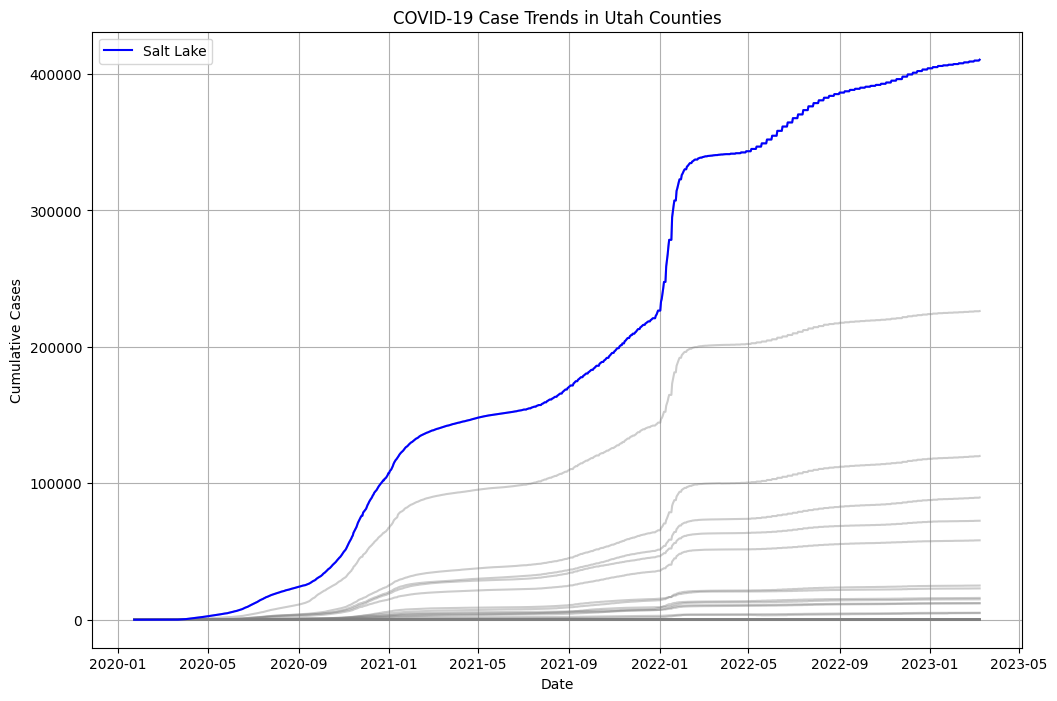

In [3]:
# Filter data for Utah
utah_data = covid_df[covid_df['Province_State'] == 'Utah']
utah_cases = utah_data.iloc[:, 11:].transpose()
utah_cases.columns = utah_data['Admin2']  
utah_cases.index = pd.to_datetime(utah_cases.index) 

# Create plot
plt.figure(figsize=(12, 8))
for county in utah_cases.columns:
    plt.plot(utah_cases.index, utah_cases[county], color='grey', alpha=0.4)  # Plot all counties in grey

# Highlight a specific county
highlighted_county = 'Salt Lake'
plt.plot(utah_cases.index, utah_cases[highlighted_county], color='blue', label=highlighted_county)  # Plot in blue

# Customize plot
plt.title('COVID-19 Case Trends in Utah Counties')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid()
plt.show()


# viz 2

Create a visualization that shows the contrast between the county in Utah with the most cases to date to a county in Florida with the most cases to date.
The graphic should:
    
-Have only two counties plotted
    
-Highlight the difference between the two comparison counties
    
You may use any style of graphic you like as long as it is effective (dense) and readable

C:\Users\DAVID\AppData\Local\Temp\ipykernel_22272\1455576975.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  florida_time_series.index = pd.to_datetime(florida_time_series.index)


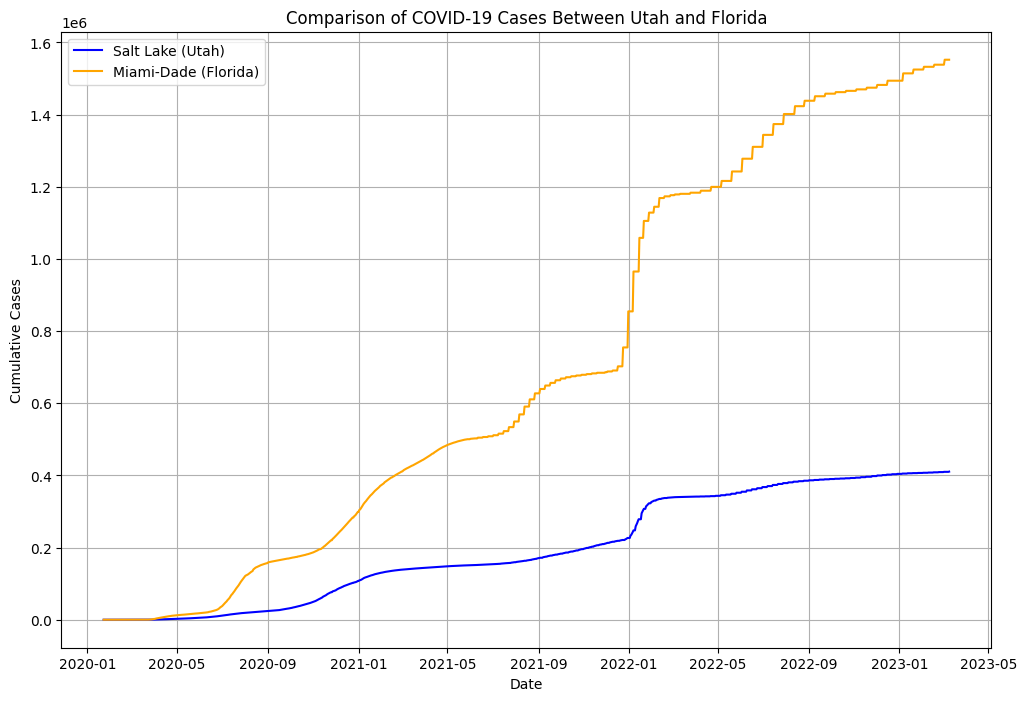

In [4]:
# Filter data for Florida
florida_data = covid_df[covid_df['Province_State'] == 'Florida']

# Identify counties with the highest cases in Utah and Florida
highest_utah_county = utah_data.loc[utah_data.iloc[:, -1].idxmax(), 'Admin2']
highest_florida_county = florida_data.loc[florida_data.iloc[:, -1].idxmax(), 'Admin2']

# Extract time series data
utah_time_series = utah_cases[highest_utah_county]
florida_time_series = florida_data[florida_data['Admin2'] == highest_florida_county].iloc[:, 11:].transpose()
florida_time_series.index = pd.to_datetime(florida_time_series.index)

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(utah_time_series.index, utah_time_series, label=f'{highest_utah_county} (Utah)', color='blue')
plt.plot(florida_time_series.index, florida_time_series.iloc[:, 0], label=f'{highest_florida_county} (Florida)', color='orange')

# Customize plot
plt.title('Comparison of COVID-19 Cases Between Utah and Florida')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid()
plt.show()


# viz 3

Create a visualization that shows BOTH the running total of cases for a single county AND the daily new cases. The graphic should:

-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)

-Use color to contrast the two series being plotted

-Have well formatted dates as the X axis

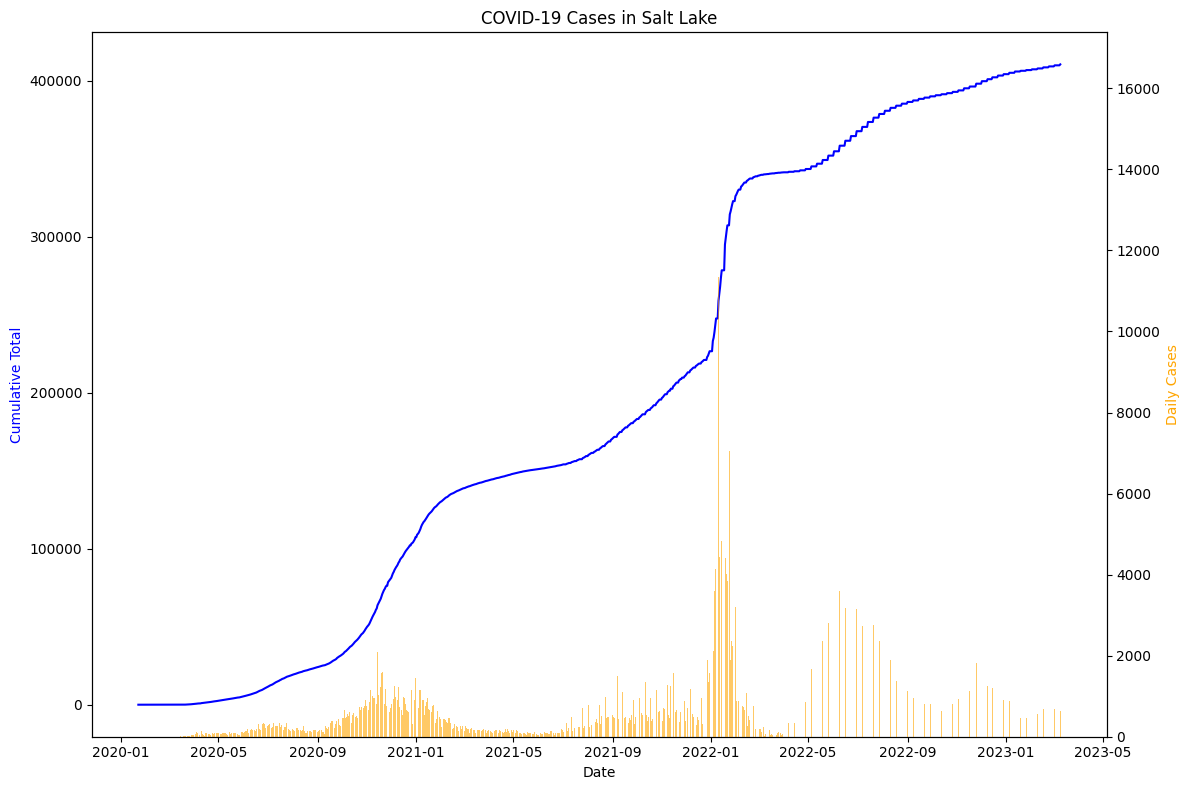

In [5]:
# Calculate daily and total cases
daily_cases = utah_cases[highlighted_county].diff().fillna(0)  # Compute daily new cases
total_cases = utah_cases[highlighted_county]  # Total cumulative cases

# Create plot with two axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot total cumulative cases
ax1.plot(utah_cases.index, total_cases, color='blue', label='Cumulative Total')
ax1.set_ylabel('Cumulative Total', color='blue')

# Plot daily new cases
ax2 = ax1.twinx()
ax2.bar(utah_cases.index, daily_cases, color='orange', alpha=0.6, label='Daily Cases')
ax2.set_ylabel('Daily Cases', color='orange')

# Customize the plot
plt.title(f'COVID-19 Cases in {highlighted_county}')
ax1.set_xlabel('Date')
fig.tight_layout()
plt.show()


# viz 4

Create a visualization that shows a stacked bar chart of county contributions to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py). The graphic should:

-Have a single column delineate a state

-Have each 'slice' or column compontent represent a county

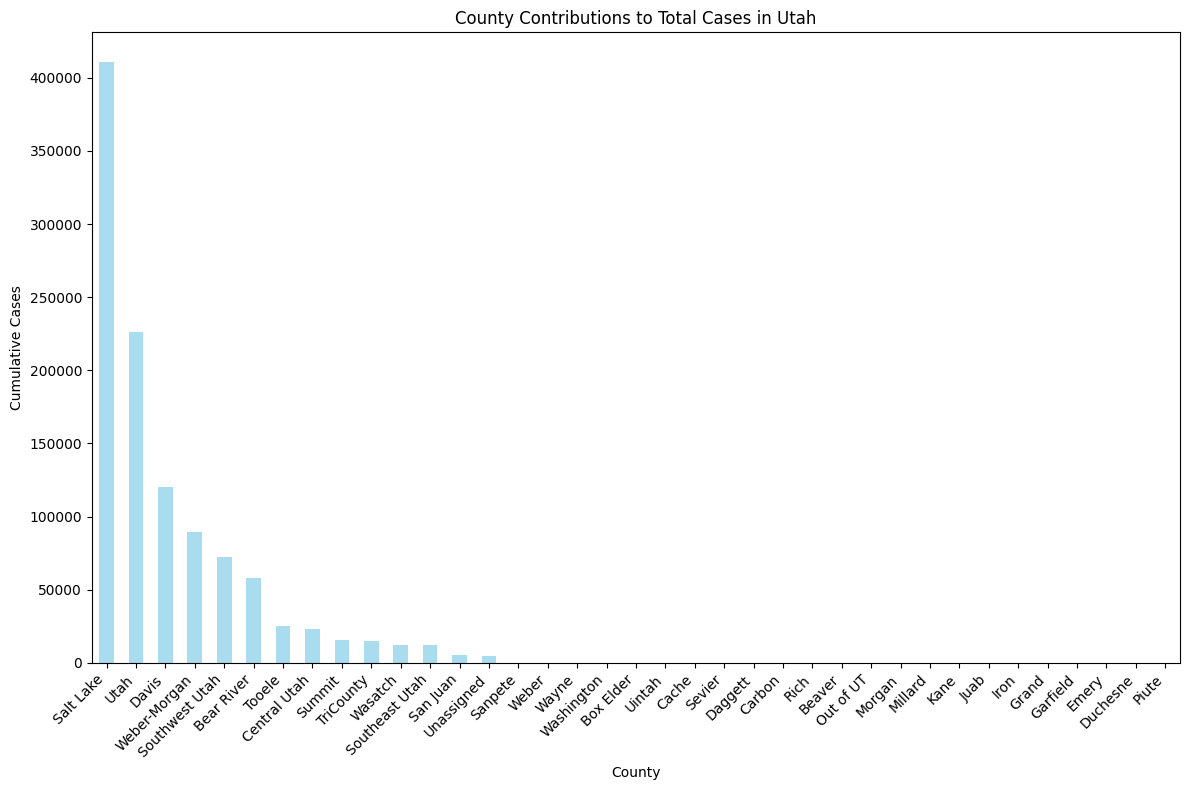

In [6]:
# Prepare data for stacked bar chart
utah_total_cases = utah_cases.iloc[-1]  # Total cases per county
utah_total_cases_sorted = utah_total_cases.sort_values(ascending=False)  # Sort counties by total cases

# Create stacked bar chart
utah_total_cases_sorted.plot(kind='bar', stacked=True, figsize=(12, 8), color='skyblue', alpha=0.7)

# Customize the plot
plt.title('County Contributions to Total Cases in Utah')
plt.xlabel('County')
plt.ylabel('Cumulative Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# extra credit (5 points)

Use Seaborn to create a grouped box plot of all reported states. Each boxplot should be a distinct state. Have the states ordered from most cases (FL) to fewest cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)

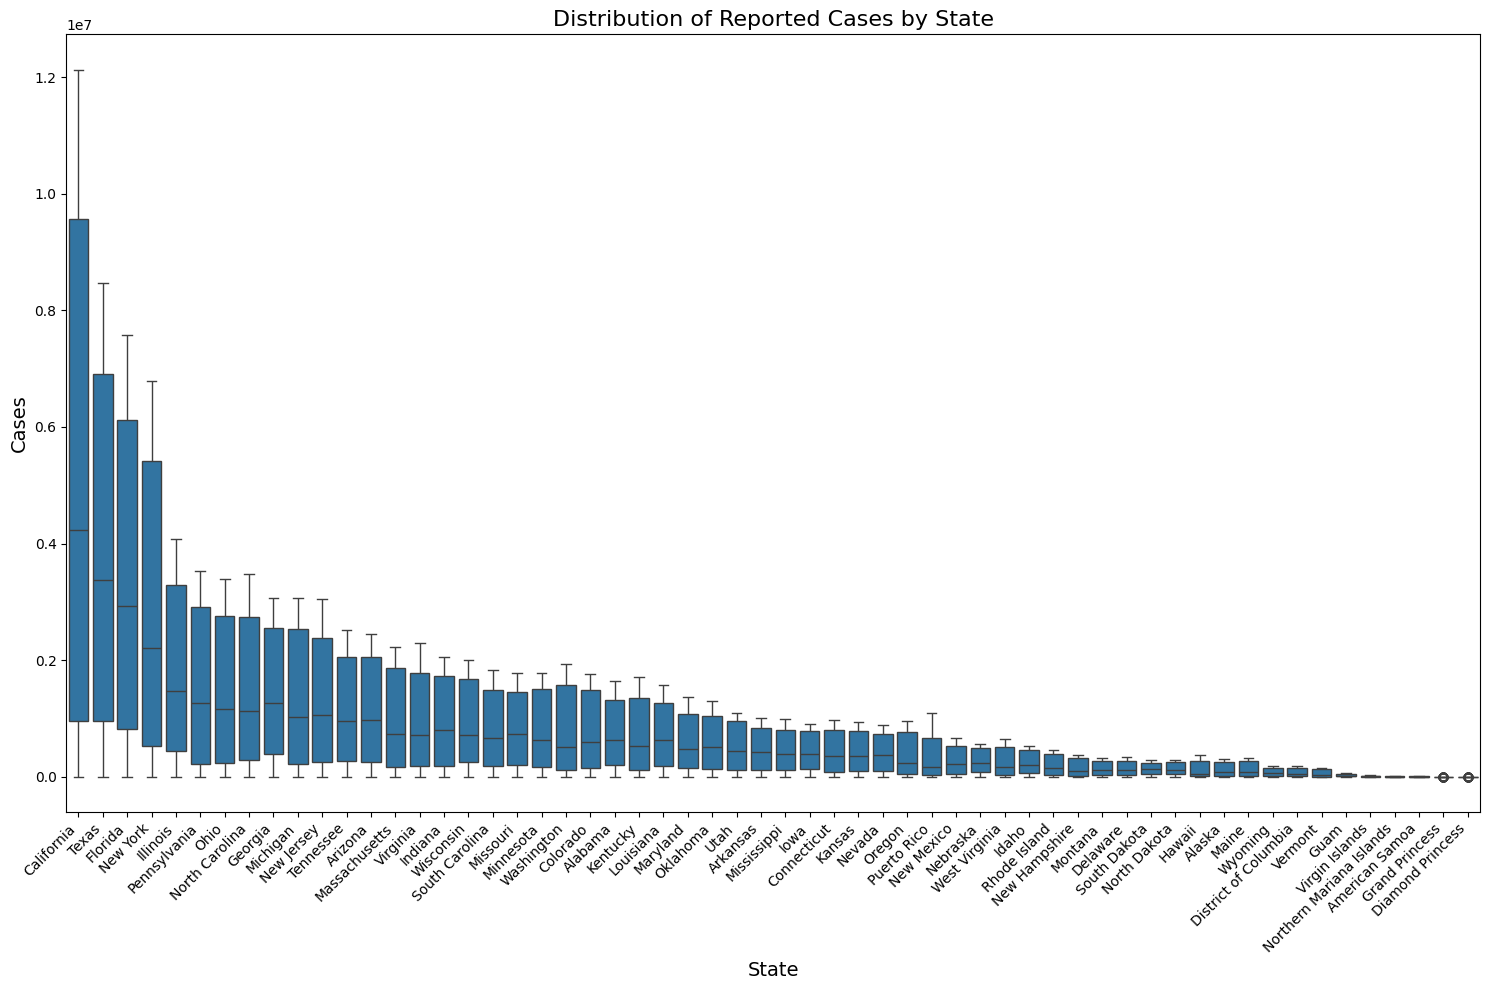

In [7]:
import seaborn as sns

state_cases = covid_df.groupby('Province_State').sum().iloc[:, 11:]
state_cases = state_cases.transpose()

# Reshape data for seaborn
state_cases_melted = state_cases.reset_index().melt(id_vars='index', var_name='State', value_name='Cases')
state_cases_melted.rename(columns={'index': 'Date'}, inplace=True)

# Create boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(
    data=state_cases_melted,
    x='State',
    y='Cases',
    order=state_cases.sum().sort_values(ascending=False).index  # Order states by total cases
)

# Customize the plot
plt.title('Distribution of Reported Cases by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
